## Jupyter notebook for plotting the correlations between CHi-C, ATAC-seq and RNA-seq

This notebook is the code for plotting the correlations between CHi-C, ATAC-seq and RNA-seq time course data used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre 

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

#### load packages

In [13]:
library(ggplot2)
library(reshape2)
library(ggsci)


### load data 
load data between gene expression (RNA-seq) and open chromatin (ATAC-seq) connected by CHi-C interactions , ATAC-seq peaks in promoter regions are excluded from the study

In [2]:
data <- read.table(file='data/ATACseq_CHiC_RNAseq_linked.txt', header=T)


### separate data by the distance between baits and otherEnds

In [3]:
data$ATACpos <- 0.5*(data$ATACstart + data$ATACend)
data$otherEndpos <- 0.5*(data$otherEndstart + data$otherEndend)
data$baitpos <- 0.5*(data$baitstart + data$baitend)
data$ENSGpos <- 0.5*(data$ENSGstart + data$ENSGend)
data$dist_ATAC_gene <- abs(data$ATACpos - data$ENSGpos)
data$dist_otherEnd_bait <- abs(data$otherEndpos - data$baitpos)
data$dist_bait_gene <- abs(data$baitpos - data$ENSGpos)
data$dist_ATAC_bait <- abs(data$baitpos - data$ATACpos)


data_200k <- subset(data, data$dist_otherEnd_bait<200000)
data_500k <- subset(data, data$dist_otherEnd_bait<500000)
data_1MB <- subset(data, data$dist_otherEnd_bait<1000000)
data_5MB <- subset(data, data$dist_otherEnd_bait<5000000)
data_from200kto500k <- subset(data, (data$dist_otherEnd_bait>=200000) 
                                                          & (data$dist_otherEnd_bait<500000))
data_from500kto1MB <- subset(data, (data$dist_otherEnd_bait>=500000) 
                                                          & (data$dist_otherEnd_bait<1000000))
data_from1MBto5MB <- subset(data, (data$dist_otherEnd_bait>=1000000) 
                                                          & (data$dist_otherEnd_bait<5000000))

### get data ready for Fig. 4a

In [5]:
idx_atacseq <- c('AT0','AT20','AT1H','AT2H','AT4H','AT24H')
idx_atacseq_withID <- c('ATACchr','ATACstart','ATACend',idx_atacseq)
idx_gene <- c('ET0_a','ET20_a','ET1H_a','ET2H_a','ET4H_a','ET24H_a')
idx_gene_withID <- c('ENSG', idx_gene)
idx_chic <- c('T0','T20','T1H','T4H','T24H')
idx_chic_withID <- c('baitID','otherEndID', idx_chic)


In [6]:
atacseq_picked_200k <- unique(data_200k[,idx_atacseq_withID])
atacseq_picked_from200kto500k <- unique(data_from200kto500k[,idx_atacseq_withID])
atacseq_picked_from500kto1MB <- unique(data_from500kto1MB[,idx_atacseq_withID])
atacseq_picked_from1MBto5MB <- unique(data_from1MBto5MB[,idx_atacseq_withID])
atacseq_picked_5MB <- unique(data_5MB[,idx_atacseq_withID])
atacseq_picked_1MB <- unique(data_1MB[,idx_atacseq_withID])
atacseq_picked_500k <- unique(data_500k[,idx_atacseq_withID])

gene_picked_200k <- unique(data_200k[,idx_gene_withID])
gene_picked_from200kto500k <- unique(data_from200kto500k[,idx_gene_withID])
gene_picked_from500kto1MB <- unique(data_from500kto1MB[,idx_gene_withID])
gene_picked_from1MBto5MB <- unique(data_from1MBto5MB[,idx_gene_withID])
gene_picked_5MB <- unique(data_5MB[,idx_gene_withID])
gene_picked_1MB <- unique(data_1MB[,idx_gene_withID])
gene_picked_500k <- unique(data_500k[,idx_gene_withID])

chic_picked_200k <- unique(data_200k[,idx_chic_withID])
chic_picked_from200kto500k <- unique(data_from200kto500k[,idx_chic_withID])
chic_picked_from500kto1MB <- unique(data_from500kto1MB[,idx_chic_withID])
chic_picked_from1MBto5MB <- unique(data_from1MBto5MB[,idx_chic_withID])
chic_picked_5MB <- unique(data_5MB[,idx_chic_withID])
chic_picked_1MB <- unique(data_1MB[,idx_chic_withID])
chic_picked_500k <- unique(data_500k[,idx_chic_withID])


### creatae random background for the correltion density plots

In [7]:
N <- 20000
idx_atac_200k_ind <- floor(runif(N, 1,dim(atacseq_picked_200k)[1]))
idx_atac_from200kto500k_ind <- floor(runif(N, 1,dim(atacseq_picked_from200kto500k)[1]))
idx_atac_from500kto1MB_ind <- floor(runif(N, 1,dim(atacseq_picked_from500kto1MB)[1]))
idx_atac_from1MBto5MB_ind <- floor(runif(N, 1,dim(atacseq_picked_from1MBto5MB)[1]))
idx_atac_5MB_ind <- floor(runif(N, 1,dim(atacseq_picked_5MB)[1]))
idx_atac_1MB_ind <- floor(runif(N, 1,dim(atacseq_picked_1MB)[1]))
idx_atac_500k_ind <- floor(runif(N, 1,dim(atacseq_picked_500k)[1]))

idx_gene_200k_ind <- floor(runif(N, 1,dim(gene_picked_200k)[1]))
idx_gene_from200kto500k_ind <- floor(runif(N, 1,dim(gene_picked_from200kto500k)[1]))
idx_gene_from500kto1MB_ind <- floor(runif(N, 1,dim(gene_picked_from500kto1MB)[1]))
idx_gene_from1MBto5MB_ind <- floor(runif(N, 1,dim(gene_picked_from1MBto5MB)[1]))
idx_gene_5MB_ind <- floor(runif(N, 1,dim(gene_picked_5MB)[1]))
idx_gene_1MB_ind <- floor(runif(N, 1,dim(gene_picked_1MB)[1]))
idx_gene_500k_ind <- floor(runif(N, 1,dim(gene_picked_500k)[1]))

idx_chic_200k_ind <- floor(runif(N, 1,dim(chic_picked_200k)[1]))
idx_chic_from200kto500k_ind <- floor(runif(N, 1,dim(chic_picked_from200kto500k)[1]))
idx_chic_from500kto1MB_ind <- floor(runif(N, 1,dim(chic_picked_from500kto1MB)[1]))
idx_chic_from1MBto5MB_ind <- floor(runif(N, 1,dim(chic_picked_from1MBto5MB)[1]))
idx_chic_5MB_ind <- floor(runif(N, 1,dim(chic_picked_5MB)[1]))
idx_chic_1MB_ind <- floor(runif(N, 1,dim(chic_picked_1MB)[1]))
idx_chic_500k_ind <- floor(runif(N, 1,dim(chic_picked_500k)[1]))


In [8]:
corr_aandg_random_200k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_200k[idx_atac_200k_ind[i],idx_atacseq]),t(gene_picked_200k[idx_gene_200k_ind[i],idx_gene])))
corr_aandg_random_from200kto500k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from200kto500k[idx_atac_from200kto500k_ind[i],idx_atacseq]),t(gene_picked_from200kto500k[idx_gene_from200kto500k_ind[i],idx_gene])))
corr_aandg_random_from500kto1MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from500kto1MB[idx_atac_from500kto1MB_ind[i],idx_atacseq]),t(gene_picked_from500kto1MB[idx_gene_from500kto1MB_ind[i],idx_gene])))
corr_aandg_random_from1MBto5MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from1MBto5MB[idx_atac_from1MBto5MB_ind[i],idx_atacseq]),t(gene_picked_from1MBto5MB[idx_gene_from1MBto5MB_ind[i],idx_gene])))
corr_aandg_random_5MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_5MB[idx_atac_5MB_ind[i],idx_atacseq]),t(gene_picked_5MB[idx_gene_5MB_ind[i],idx_gene])))
corr_aandg_random_1MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_1MB[idx_atac_1MB_ind[i],idx_atacseq]),t(gene_picked_1MB[idx_gene_1MB_ind[i],idx_gene])))
corr_aandg_random_500k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_500k[idx_atac_500k_ind[i],idx_atacseq]),t(gene_picked_500k[idx_gene_500k_ind[i],idx_gene])))


In [9]:
corr_aandOE_random_200k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_200k[idx_atac_200k_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_200k[idx_chic_200k_ind[i],idx_chic])))
corr_aandOE_random_from200kto500k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from200kto500k[idx_atac_from200kto500k_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_from200kto500k[idx_chic_from200kto500k_ind[i],idx_chic])))
corr_aandOE_random_from500kto1MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from500kto1MB[idx_atac_from500kto1MB_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_from500kto1MB[idx_chic_from500kto1MB_ind[i],idx_chic])))
corr_aandOE_random_from1MBto5MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_from1MBto5MB[idx_atac_from1MBto5MB_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_from1MBto5MB[idx_chic_from1MBto5MB_ind[i],idx_chic])))
corr_aandOE_random_5MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_5MB[idx_atac_5MB_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_5MB[idx_chic_5MB_ind[i],idx_chic])))
corr_aandOE_random_1MB_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_1MB[idx_atac_1MB_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_1MB[idx_chic_1MB_ind[i],idx_chic])))
corr_aandOE_random_500k_ind <- sapply(seq.int(N),function(i) cor(t(atacseq_picked_500k[idx_atac_500k_ind[i],c('AT0','AT20','AT1H','AT4H','AT24H')]),t(chic_picked_500k[idx_chic_500k_ind[i],idx_chic])))


In [10]:
corr_gandOE_random_200k_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_200k[idx_gene_200k_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_200k[idx_chic_200k_ind[i],idx_chic])))
corr_gandOE_random_from200kto500k_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_from200kto500k[idx_gene_from200kto500k_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_from200kto500k[idx_chic_from200kto500k_ind[i],idx_chic])))
corr_gandOE_random_from500kto1MB_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_from500kto1MB[idx_gene_from500kto1MB_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_from500kto1MB[idx_chic_from500kto1MB_ind[i],idx_chic])))
corr_gandOE_random_from1MBto5MB_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_from1MBto5MB[idx_gene_from1MBto5MB_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_from1MBto5MB[idx_chic_from1MBto5MB_ind[i],idx_chic])))
corr_gandOE_random_5MB_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_5MB[idx_gene_5MB_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_5MB[idx_chic_5MB_ind[i],idx_chic])))
corr_gandOE_random_1MB_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_1MB[idx_gene_1MB_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_1MB[idx_chic_1MB_ind[i],idx_chic])))
corr_gandOE_random_500k_ind <- sapply(seq.int(N),function(i) cor(t(gene_picked_500k[idx_gene_500k_ind[i],c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')]),t(chic_picked_500k[idx_chic_500k_ind[i],idx_chic])))


### plotting the correlation densities whthin different distance ranges

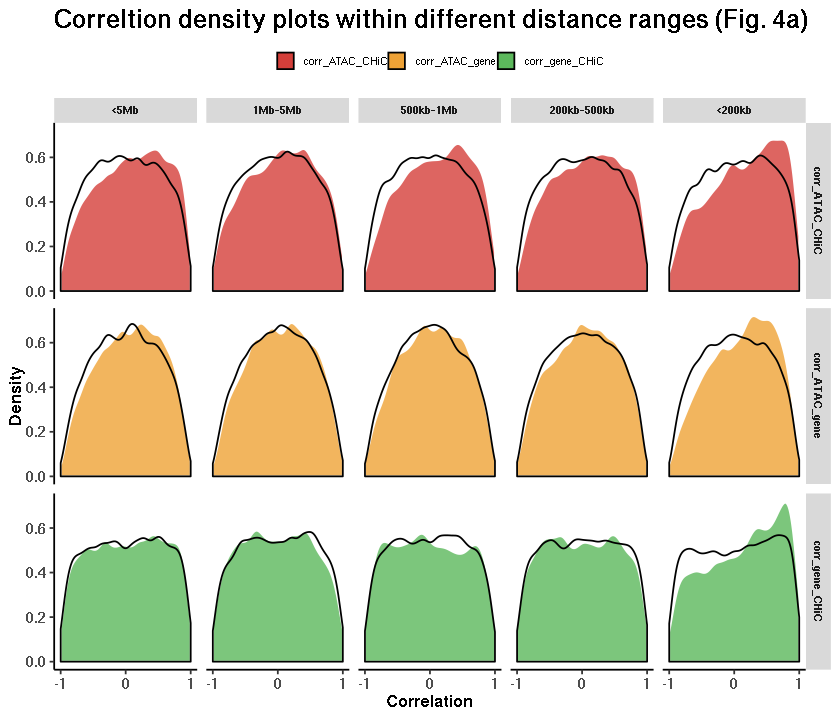

In [16]:
row0 <- dim(data_5MB)[1]
rowfrom1MBto5MB <- dim(data_from1MBto5MB)[1]
rowfrom500kto1MB <-dim(data_from500kto1MB)[1]
rowfrom200kto500k <- dim(data_from200kto500k)[1]
row200k <- dim(data_200k)[1]
row_all <- row0 + rowfrom1MBto5MB +rowfrom500kto1MB + rowfrom200kto500k + row200k
data_forplot <- data.frame( correlation=c(data_5MB$corr_atacseq_gene, 
   data_from1MBto5MB$corr_atacseq_gene, data_from500kto1MB$corr_atacseq_gene, 
   data_from200kto500k$corr_atacseq_gene, data_200k$corr_atacseq_gene, data_5MB$corr_atacseq_otherEnd, 
   data_from1MBto5MB$corr_atacseq_otherEnd, data_from500kto1MB$corr_atacseq_otherEnd, 
   data_from200kto500k$corr_atacseq_otherEnd, data_200k$corr_atacseq_otherEnd, data_5MB$corr_gene_otherEnd, 
   data_from1MBto5MB$corr_gene_otherEnd, data_from500kto1MB$corr_gene_otherEnd, 
   data_from200kto500k$corr_gene_otherEnd, data_200k$corr_gene_otherEnd), 
    
    label=rep(c('corr_ATAC_gene','corr_ATAC_CHiC','corr_gene_CHiC'), each=row_all), 
            category=rep(rep(c('<5Mb','1Mb-5Mb','500kb-1Mb','200kb-500kb','<200kb'), 
                             c(row0, rowfrom1MBto5MB, rowfrom500kto1MB, rowfrom200kto500k, row200k)),3)
    )

data_forplot$category_f <- factor(data_forplot$category, levels=c('<5Mb','1Mb-5Mb','500kb-1Mb','200kb-500kb','<200kb'))

data_forplot2 <- data.frame(correlation_random = c(corr_aandg_random_5MB_ind, corr_aandg_random_from1MBto5MB_ind, 
                                                   corr_aandg_random_from500kto1MB_ind, corr_aandg_random_from200kto500k_ind, 
                                                   corr_aandg_random_200k_ind,
                                                   corr_aandOE_random_5MB_ind, corr_aandOE_random_from1MBto5MB_ind,
                                                   corr_aandOE_random_from500kto1MB_ind, corr_aandOE_random_from200kto500k_ind,
                                                   corr_aandOE_random_200k_ind,
                                                   corr_gandOE_random_5MB_ind, corr_gandOE_random_from1MBto5MB_ind,
                                                   corr_gandOE_random_from500kto1MB_ind, corr_gandOE_random_from200kto500k_ind,
                                                   corr_gandOE_random_200k_ind),
                    label=rep(c('corr_ATAC_gene','corr_ATAC_CHiC','corr_gene_CHiC'), each=5*N), 
                    category=rep(rep(c('<5Mb','1Mb-5Mb','500kb-1Mb','200kb-500kb','<200kb'), each=N)))
data_forplot2$category_f <- factor(data_forplot2$category, levels=c('<5Mb','1Mb-5Mb','500kb-1Mb','200kb-500kb','<200kb'))

ggplot() + geom_density(data=data_forplot , aes(x=correlation, fill=label), color='white', alpha=0.8)  +
geom_density(data=data_forplot2, aes(x=correlation_random), color='black', size=0.5, alpha=1.0) +
 scale_x_continuous(breaks=c(-1.0,0.0,1.0), labels=c(-1.0,0.0,1.0)) +
scale_fill_locuszoom() + 
theme(panel.background = element_blank(), plot.title = element_text(face='bold', size=14),
         axis.title=element_text(size=10,face="bold"), axis.text=element_text(size=8,face="bold"), axis.line=element_line('black'),
      ,legend.title=element_blank(), legend.text=element_text(size=6), 
      legend.box.background = element_rect(size=3, color='NA'),
      legend.key.size = unit(0.4, "cm"), legend.spacing.x = unit(0.2, 'cm'),
      strip.text.x=element_text(siz=6, face='bold'), strip.text.y=element_text(size=6, face='bold'), legend.position="top") +
 xlab('Correlation') + ylab('Density') + ggtitle('Correltion density plots within different distance ranges (Fig. 4a)') +
facet_grid(label ~ category_f)




### Plotting correlation densities for different distance thresholds

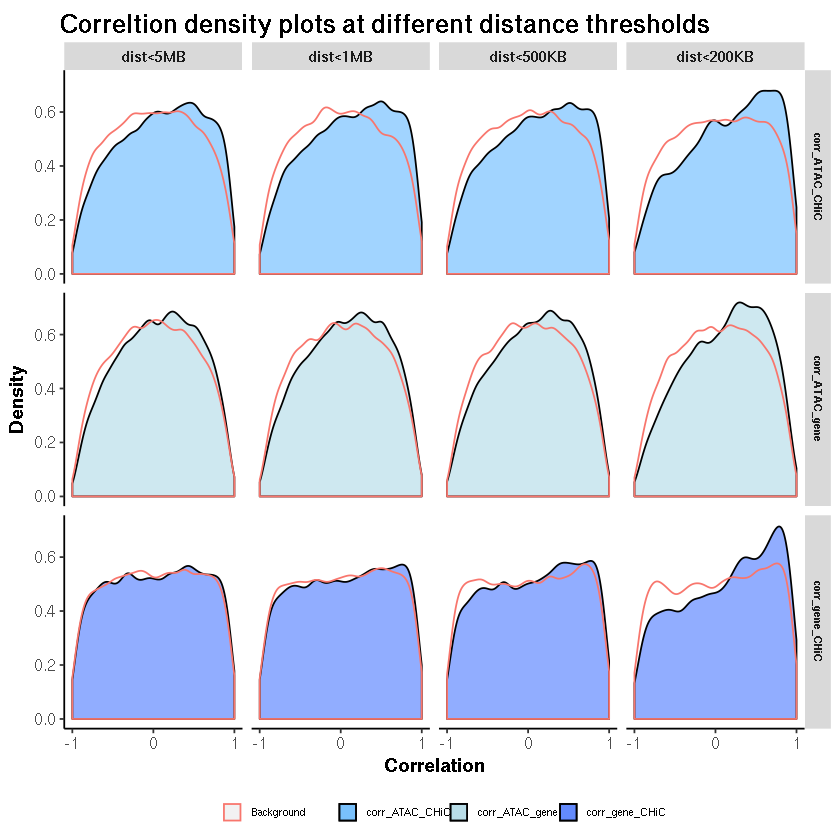

In [12]:
row0 <- dim(data_5MB)[1]
row1MB <- dim(data_1MB)[1]
row500k <-dim(data_500k)[1]
row200k <- dim(data_200k)[1]
row_all <- row0 + row1MB +row500k + row200k
data_forplot <- data.frame( correlation=c(data_5MB$corr_atacseq_gene, 
   data_1MB$corr_atacseq_gene, data_500k$corr_atacseq_gene, 
   data_200k$corr_atacseq_gene, data_5MB$corr_atacseq_otherEnd, 
   data_1MB$corr_atacseq_otherEnd, data_500k$corr_atacseq_otherEnd, 
   data_200k$corr_atacseq_otherEnd, data_5MB$corr_gene_otherEnd, 
   data_1MB$corr_gene_otherEnd, data_500k$corr_gene_otherEnd, 
   data_200k$corr_gene_otherEnd),     
    label=rep(c('corr_ATAC_gene','corr_ATAC_CHiC','corr_gene_CHiC'), each=row_all), 
            category=rep(rep(c('dist<5MB','dist<1MB','dist<500KB','dist<200KB'), c(row0, row1MB, row500k, row200k)),3)
    )

data_forplot$category_f <- factor(data_forplot$category, levels=c('dist<5MB','dist<1MB','dist<500KB','dist<200KB'))

data_forplot2 <- data.frame(correlation_random = c(corr_aandg_random_5MB_ind, corr_aandg_random_1MB_ind, 
                                                   corr_aandg_random_500k_ind, corr_aandg_random_200k_ind, 
                                                   corr_aandOE_random_5MB_ind, corr_aandOE_random_1MB_ind,
                                                   corr_aandOE_random_500k_ind, corr_aandOE_random_200k_ind,
                                                   corr_gandOE_random_5MB_ind, corr_gandOE_random_1MB_ind,
                                                   corr_gandOE_random_500k_ind, corr_gandOE_random_200k_ind),
                    label=rep(c('corr_ATAC_gene','corr_ATAC_CHiC','corr_gene_CHiC'), each=4*N), 
                    category=rep(rep(c('dist<5MB','dist<1MB','dist<500KB','dist<200KB'), each=N)))
data_forplot2$category_f <- factor(data_forplot2$category, levels=c('dist<5MB','dist<1MB','dist<500KB','dist<200KB'))

ggplot() + geom_density(data=data_forplot , aes(x=correlation, fill=label), alpha=0.6)  +
geom_density(data=data_forplot2, aes(x=correlation_random, color='Background'), alpha=0.6) +
 scale_x_continuous(breaks=c(-1.0,0.0,1.0), labels=c(-1.0,0.0,1.0)) +

scale_fill_manual(values=c('corr_ATAC_gene'='lightblue','corr_ATAC_CHiC'='steelblue1','corr_gene_CHiC'='royalblue1',
                           'Background'='black')) +
theme(panel.background = element_blank(), plot.title = element_text(face='bold', size=14, hjust=-0.05, vjust=0.1),
         axis.title=element_text(size=12,face="bold"), axis.text=element_text(size=10), axis.line=element_line('black'),
      ,legend.title=element_blank(), legend.text=element_text(size=6), 
      legend.box.background = element_rect(size=3, color='NA'),
      legend.key.size = unit(0.4, "cm"), legend.spacing.x = unit(0.2, 'cm'),
      strip.text.x=element_text(siz=8, face='bold'), strip.text.y=element_text(size=6, face='bold'), legend.position="bottom") +
 xlab('Correlation') + ylab('Density') + ggtitle('Correltion density plots at different distance thresholds') +
facet_grid(label ~ category_f)

